<a href="https://colab.research.google.com/github/ClementPla/DeepFiberQ/blob/main/DeepFiberQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
Create a data folder on the left panel and upload your images in it.

The accepted formats are tif or czi. But czi seems buggy, so tif preferred for now.

## GPUs

If available, we recommend using a GPU (available on the top right, in the dropdown, select "Change runtime type)"

In [1]:
!pip uninstall -y dnafiber
!pip install -q git+https://github.com/ClementPla/DeepFiberQ

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB

In [2]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path


from dnafiber import get_model
from dnafiber.inference import run, convert_to_dataset, convert_mask_to_image, load_image


In [3]:
output = Path('output')
output.mkdir(exist_ok=True, parents=True)

In [4]:
def save(df, mask, filepath):
  output_csv = output / 'csv'/ (d.stem + '.csv')
  output_mask = output/ 'mask' / (d.stem + '.png')
  output_color = output/ 'color' / (d.stem + '.png')

  output_csv.parent.mkdir(exist_ok=True, parents=True)
  output_mask.parent.mkdir(exist_ok=True, parents=True)
  output_color.parent.mkdir(exist_ok=True, parents=True)

  mask_color = convert_mask_to_image(mask, expand=10)
  cv2.imwrite(str(output_mask), mask.astype(np.uint8))
  cv2.imwrite(str(output_color), mask_color[:,:,::-1])

  df.to_csv(output_csv, index=False)


In [7]:
model = get_model()
for d in Path("data/").rglob('*.tif'):
  mask, counts = run(model, str(d), use_cuda=True)
  # If you don't have GPUs, set use_cuda=False

  df = convert_to_dataset(counts)
  save(df, mask, d)



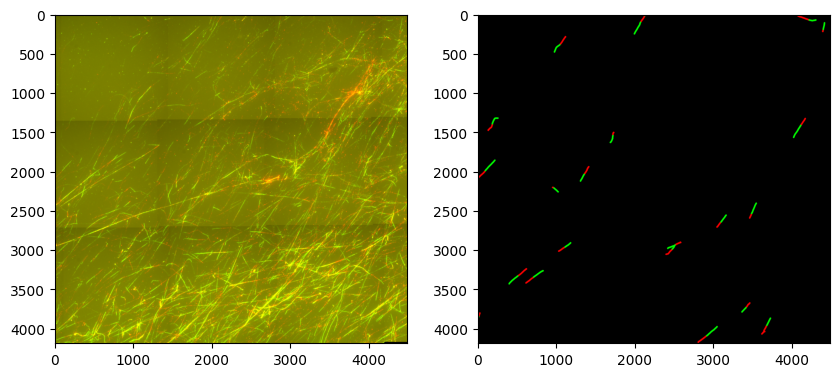

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
image = load_image(str(d))
mask_color = convert_mask_to_image(mask, expand=10)
axs[0].imshow(image)
axs[1].imshow(mask_color)
plt.show()


In [10]:
86/84

1.0238095238095237